In [1]:
#!pip install -U scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
#import pandas.core.common import flatten

Fitting 30 folds for each of 10 candidates, totalling 300 fits
Results for  accuracy
Best: 0.990476 using {'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': 60, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': False}
0.988571 (0.008659) with: {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_leaf_nodes': 40, 'max_features': 'sqrt', 'max_depth': 80, 'criterion': 'gini', 'bootstrap': True}
0.990159 (0.008056) with: {'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_leaf_nodes': 40, 'max_features': 'sqrt', 'max_depth': 80, 'criterion': 'entropy', 'bootstrap': False}
0.989365 (0.009009) with: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_leaf_nodes': 100, 'max_features': 'sqrt', 'max_depth': 80, 'criterion': 'entropy', 'bootstrap': True}
0.990476 (0.007968) with: {'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': 60, 'max_

<Figure size 720x1080 with 0 Axes>

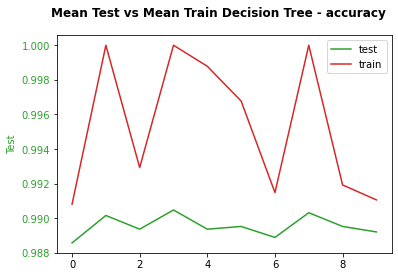

Fitting 30 folds for each of 10 candidates, totalling 300 fits
Results for  neg_log_loss
Best: -0.045099 using {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_leaf_nodes': 20, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': False}
-0.051970 (0.041257) with: {'n_estimators': 40, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_leaf_nodes': 100, 'max_features': 'auto', 'max_depth': 40, 'criterion': 'gini', 'bootstrap': False}
-0.053045 (0.022826) with: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_leaf_nodes': 100, 'max_features': 'sqrt', 'max_depth': 90, 'criterion': 'entropy', 'bootstrap': True}
-0.045099 (0.022239) with: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_leaf_nodes': 20, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': False}
-0.051731 (0.048874) with: {'n_estimators': 40, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_leaf_

<Figure size 720x1080 with 0 Axes>

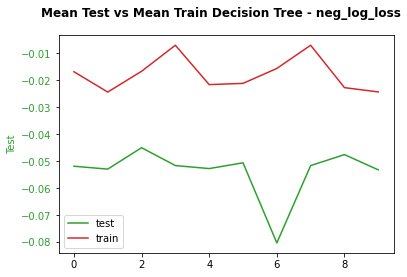

In [3]:
#Hypertune with 100 steps
no_of_robot_steps = 100

fixed_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_xs.csv", delimiter=',')
fixed_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_ys.csv", delimiter=',')
fixed_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_thetas.csv", delimiter=',')

omni_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_xs.csv", delimiter=',')
omni_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_ys.csv", delimiter=',')
omni_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_thetas.csv", delimiter=',')

two_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_xs.csv", delimiter=',')
two_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_ys.csv", delimiter=',')
two_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_thetas.csv", delimiter=',')


len_of_steps = len(fixed_wheel_x[0])
total_len_of_columns = len_of_steps * 3
total_pose_size = len(fixed_wheel_x.flatten()) + len(fixed_wheel_y.flatten()) + len(fixed_wheel_theta.flatten())
total_pose_size = int(total_pose_size/total_len_of_columns)

#print("Number of robot steps: ", len_of_steps, "\nLenght of columns for steps (x,y,theta): ",total_len_of_columns, "\nTotal number of samples: ", total_pose_size)

fixed_wheel_poses = np.column_stack((fixed_wheel_x.flatten(),fixed_wheel_y.flatten(),fixed_wheel_theta.flatten()))
fixed_wheel_poses = np.reshape(fixed_wheel_poses,(total_pose_size,total_len_of_columns))


omni_wheel_poses = np.column_stack((omni_wheel_x.flatten(),omni_wheel_y.flatten(),omni_wheel_theta.flatten()))
omni_wheel_poses = np.reshape(omni_wheel_poses,(total_pose_size,total_len_of_columns))

two_fixed_wheel_poses = np.column_stack((two_wheel_x.flatten(),two_wheel_y.flatten(),two_wheel_theta.flatten()))
two_fixed_wheel_poses = np.reshape(two_fixed_wheel_poses,(total_pose_size,total_len_of_columns))

x_headings = ["step x " + str(i+1) for i in range(int(total_len_of_columns/3))]
y_headings = ["step y " + str(i+1) for i in range(int(total_len_of_columns/3))]
theta_headings = ["step theta " + str(i+1) for i in range(int(total_len_of_columns/3))]

headings = []
for i in range(0,len(x_headings)):
    headings.append(x_headings[i])
    headings.append(y_headings[i])
    headings.append(theta_headings[i])
#headings = x_headings + y_headings + theta_headings
#headings

fixed_p = pd.DataFrame(fixed_wheel_poses, columns = headings)
omni_p = pd.DataFrame(omni_wheel_poses, columns = headings)
two_fixed_p = pd.DataFrame(two_fixed_wheel_poses, columns = headings)

#Add class labels
fixed_p.insert(0,'Model type', 'fw')
omni_p.insert(0,'Model type', 'ow')
two_fixed_p.insert(0,'Model type', 'tf')

wheel_poses = pd.concat([fixed_p, omni_p, two_fixed_p])

wheel_poses = wheel_poses.iloc[np.random.RandomState(seed=16).permutation(len(wheel_poses))]
wheel_poses = wheel_poses.reset_index(drop=True)

X = wheel_poses.drop(columns='Model type')
y = wheel_poses['Model type']

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.3, random_state=16)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state=16)

reg_randomforest = RandomForestClassifier(random_state=16)
reg_randomforest.fit(X_train, y_train)
y_pred = reg_randomforest.predict(X_valid)

scorings = ['accuracy', 'neg_log_loss']

params_grid = {
    'criterion':['gini', 'entropy'],
    'max_leaf_nodes':[20,40,60,80,100],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[2,3,4],
    'max_depth':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features':['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False],
    'n_estimators': [20, 40, 60, 80, 100]
    }

for scoring in scorings:
    #Perform random search instead of grid
    
    grid = params_grid
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #grid_search = GridSearchCV(estimator=reg_randomforest, param_grid=grid, n_jobs=-1, cv=cv, scoring=scoring,error_score=0, verbose = 4)
    random_search = RandomizedSearchCV(estimator=reg_randomforest, param_distributions=grid, n_jobs=-1, cv=cv, scoring=scoring,error_score=0, verbose = 4, return_train_score=True)
    random_result = random_search.fit(X_train, y_train)
    # summarize results
    print("Results for ", scoring)
    print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
    means_test = random_result.cv_results_['mean_test_score']
    stds_test = random_result.cv_results_['std_test_score']
    means_train = random_result.cv_results_['mean_train_score']
    stds_train = random_result.cv_results_['std_train_score']    
    params = random_result.cv_results_['params']
    
    for mean, stdev, param in zip(means_test, stds_test, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    means_test = random_result.cv_results_['mean_test_score']
    means_train = random_result.cv_results_['mean_train_score']
    
    
    plt.figure(figsize=(10,15))
    fig, ax1 = plt.subplots()
    
    
    color1 = 'tab:green'
    color2 = 'tab:red'
    ax1.set_ylabel('Test', color = color1)
    ax1.plot(means_test, color = color1, label = 'test')
    ax1.plot(means_train, color = color2, label = 'train')
    ax1.tick_params(axis ='y', labelcolor = color1)
    
    
    fig.suptitle('Mean Test vs Mean Random Forest - ' + str(scoring), fontweight ="bold")
    plt.legend(loc='best')
    plt.show()



C:\Users\ayoid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.30666666666666664


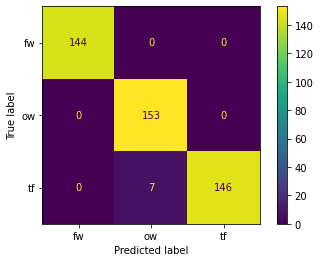

In [4]:
#Make predictionwith un-tuned model
confusion_matrix = metrics.plot_confusion_matrix(reg_randomforest, X_test, y_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix)


C:\Users\ayoid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.9844444444444445


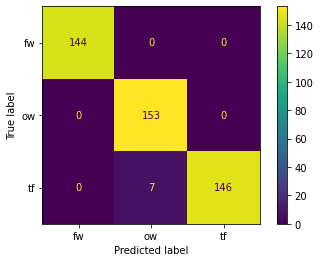

In [5]:
#Best: -0.049166 using {'n_estimators': 60, 'min_samples_split': 10, 'min_samples_leaf': 4, 
#'max_leaf_nodes': 60, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True}

#Make prediction with hypertuned model
reg_best_log_rf = RandomForestClassifier(n_estimators= 60, min_samples_split= 10, min_samples_leaf= 4, 
max_leaf_nodes= 60, max_features= 'auto', max_depth= 30, criterion= 'entropy', bootstrap=True)

reg_best_log_rf.fit(X_train, y_train)
y_pred_best_log = reg_best_log_rf.predict(X_test)
confusion_matrix_best_log = metrics.plot_confusion_matrix(reg_best_log_rf, X_test, y_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_best_log))
print(confusion_matrix_best_log)



<Figure size 720x1080 with 0 Axes>

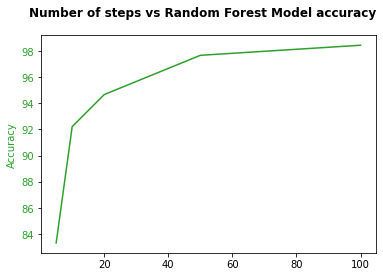

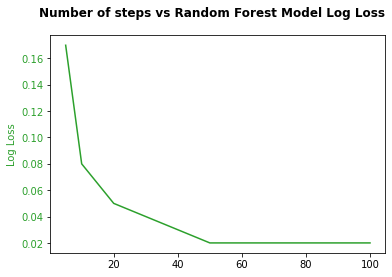

In [7]:
#And we run the number of steps with our best model to see how the number of steps relates with the 
#moels performance. 
def get_step_results(no_of_robot_steps):
    fixed_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_xs.csv", delimiter=',')
    fixed_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_ys.csv", delimiter=',')
    fixed_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_thetas.csv", delimiter=',')

    omni_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_xs.csv", delimiter=',')
    omni_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_ys.csv", delimiter=',')
    omni_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_thetas.csv", delimiter=',')

    two_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_xs.csv", delimiter=',')
    two_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_ys.csv", delimiter=',')
    two_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_thetas.csv", delimiter=',')

    #Get parameters of the dataframe we will need to build
    len_of_steps = len(fixed_wheel_x[0])
    total_len_of_columns = len_of_steps * 3
    total_pose_size = len(fixed_wheel_x.flatten()) + len(fixed_wheel_y.flatten()) + len(fixed_wheel_theta.flatten())
    total_pose_size = int(total_pose_size/total_len_of_columns)

    #print("Number of robot steps: ", len_of_steps, "\nLenght of columns for steps (x,y,theta): ",total_len_of_columns, "\nTotal number of samples: ", total_pose_size)

    #Expose and reshape the measurements in the respective wheels 
    #to build a dataframe for the wheeltype
    fixed_wheel_poses = np.column_stack((fixed_wheel_x.flatten(),fixed_wheel_y.flatten(),fixed_wheel_theta.flatten()))
    fixed_wheel_poses = np.reshape(fixed_wheel_poses,(total_pose_size,total_len_of_columns))

    omni_wheel_poses = np.column_stack((omni_wheel_x.flatten(),omni_wheel_y.flatten(),omni_wheel_theta.flatten()))
    omni_wheel_poses = np.reshape(omni_wheel_poses,(total_pose_size,total_len_of_columns))
    
    two_fixed_wheel_poses = np.column_stack((two_wheel_x.flatten(),two_wheel_y.flatten(),two_wheel_theta.flatten()))
    two_fixed_wheel_poses = np.reshape(two_fixed_wheel_poses,(total_pose_size,total_len_of_columns))

    #Creating the column names. Each measurement contains a X,y and theta value
    x_headings = ["step x " + str(i+1) for i in range(int(total_len_of_columns/3))]
    y_headings = ["step y " + str(i+1) for i in range(int(total_len_of_columns/3))]
    theta_headings = ["step theta " + str(i+1) for i in range(int(total_len_of_columns/3))]
    headings = []
    for i in range(0,len(x_headings)):
        headings.append(x_headings[i])
        headings.append(y_headings[i])
        headings.append(theta_headings[i])
    #headings = x_headings + y_headings + theta_headings
    #headings

    #Creating the respective wheel dataframes
    fixed_p = pd.DataFrame(fixed_wheel_poses, columns = headings)
    omni_p = pd.DataFrame(omni_wheel_poses, columns = headings)
    two_fixed_p = pd.DataFrame(two_fixed_wheel_poses, columns = headings)

    #Tagging class labels in a new column with the wheel type 
    #and joining the dataframes into one, we shuffle the dataframe
    #and reset the index
    fixed_p.insert(0,'Model type', 'fw')
    omni_p.insert(0,'Model type', 'ow')
    two_fixed_p.insert(0,'Model type', 'tf')
    wheel_poses = pd.concat([fixed_p, omni_p, two_fixed_p])
    wheel_poses = wheel_poses.iloc[np.random.RandomState(seed=16).permutation(len(wheel_poses))]
    wheel_poses = wheel_poses.reset_index(drop=True)

    X = wheel_poses.drop(columns='Model type')
    y = wheel_poses['Model type']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=16)
 

    
    reg_best_log_rf = RandomForestClassifier(n_estimators= 60, min_samples_split= 10, min_samples_leaf= 4, 
max_leaf_nodes= 60, max_features= 'auto', max_depth= 30, criterion= 'entropy', bootstrap=True)

    reg_best_log_rf.fit(X_train, y_train)
    y_pred_rf = reg_best_log_rf.predict(X_test)

    dic_acc = {}
    dic_zol = {}
    
    #confusion_matrix = metrics.plot_confusion_matrix(reg_best_log_rf, X_test, y_test)    
    #print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_rf))


    dic_acc['ACC'] = round(metrics.accuracy_score(y_test, y_pred_rf)*100,2)
    dic_zol['Zero One Loss'] = round(metrics.zero_one_loss(y_test, y_pred_rf),2)

    model_name = str(len_of_steps) + '_steps_RF_robot_model_weights.sav' 
    pickle.dump(reg_best_log_rf, open(model_name, 'wb'))
    
    return dic_acc, dic_zol


steps = [5, 10, 20, 50, 100]
#steps = [100, 500, 1000, 2000, 5000, 10000]

step_dic = {}
#Collects the accuracy and log loss for each step
#steps = [5]

for no_of_robot_steps in steps:
    step_acc, step_zol = get_step_results(no_of_robot_steps)
    step_dic[no_of_robot_steps] = [step_acc, step_zol]
    
k_list = []
v_list = []
z_list = []
for k, v in step_dic.items():
    k_list.append(k) 
    v_list.append(list(v[0].values())[0])
    z_list.append(list(v[1].values())[0])
    #print("For step: ", k, "the results are: ", v )

plt.figure(figsize=(10,15))
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_ylabel('Accuracy', color = color)
ax1.plot(k_list, v_list, color = color)
ax1.tick_params(axis ='y', labelcolor = color)
fig.suptitle('Number of steps vs Random Forest Model accuracy\n', fontweight ="bold")
plt.show()

fig2, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_ylabel('Log Loss', color = color)
ax1.plot(k_list, z_list, color = color)
ax1.tick_params(axis ='y', labelcolor = color)
fig2.suptitle('Number of steps vs Random Forest Model Log Loss\n', fontweight ="bold")
plt.show()

    

    


In [8]:
step_dic

{5: [{'ACC': 83.33}, {'Zero One Loss': 0.17}],
 10: [{'ACC': 92.22}, {'Zero One Loss': 0.08}],
 20: [{'ACC': 94.67}, {'Zero One Loss': 0.05}],
 50: [{'ACC': 97.67}, {'Zero One Loss': 0.02}],
 100: [{'ACC': 98.44}, {'Zero One Loss': 0.02}]}